In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sb
sb.set_style("darkgrid")
%matplotlib inline

/Users/aiqbal/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#Read in data from source 
df_raw = pd.read_csv("../Ayesha_hwk/Final_Project_Assets/properties_2016.csv")
#print df_raw.head()

/Users/aiqbal/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
df_raw.count()

parcelid                        2985217
airconditioningtypeid            811519
architecturalstyletypeid           6061
basementsqft                       1628
bathroomcnt                     2973755
bedroomcnt                      2973767
buildingclasstypeid               12629
buildingqualitytypeid           1938488
calculatedbathnbr               2856305
decktypeid                        17096
finishedfloor1squarefeet         202717
calculatedfinishedsquarefeet    2929652
finishedsquarefeet12            2709184
finishedsquarefeet13               7672
finishedsquarefeet15             190798
finishedsquarefeet50             202717
finishedsquarefeet6               22001
fips                            2973780
fireplacecnt                     312637
fullbathcnt                     2856305
garagecarcnt                     883267
garagetotalsqft                  883267
hashottuborspa                    69014
heatingorsystemtypeid           1806401
latitude                        2973780


In [3]:
df_train = pd.read_csv("../Ayesha_hwk/Final_Project_Assets/train_2016_v2.csv")
print df_train.head()

   parcelid  logerror transactiondate
0  11016594    0.0276      2016-01-01
1  14366692   -0.1684      2016-01-01
2  12098116   -0.0040      2016-01-01
3  12643413    0.0218      2016-01-02
4  14432541   -0.0050      2016-01-02


In [4]:
df = df_raw[['parcelid','bathroomcnt','bedroomcnt','calculatedfinishedsquarefeet', 'latitude', 'longitude', 
             'lotsizesquarefeet', 'poolcnt','propertycountylandusecode','propertylandusetypeid','regionidcity',
             'regionidcounty', 'regionidzip', 'roomcnt', 'yearbuilt', 'numberofstories','structuretaxvaluedollarcnt',
             'taxvaluedollarcnt','assessmentyear','landtaxvaluedollarcnt','taxamount']]

In [5]:
df.count()

parcelid                        2985217
bathroomcnt                     2973755
bedroomcnt                      2973767
calculatedfinishedsquarefeet    2929652
latitude                        2973780
longitude                       2973780
lotsizesquarefeet               2709118
poolcnt                          517534
propertycountylandusecode       2972940
propertylandusetypeid           2973780
regionidcity                    2922372
regionidcounty                  2973780
regionidzip                     2971237
roomcnt                         2973742
yearbuilt                       2925289
numberofstories                  682069
structuretaxvaluedollarcnt      2930235
taxvaluedollarcnt               2942667
assessmentyear                  2973778
landtaxvaluedollarcnt           2917484
taxamount                       2953967
dtype: int64

In [5]:
df['poolcnt'].fillna(0,inplace = True)
df['numberofstories'].fillna(1,inplace = True)
df = df.dropna()
df.count()

/Users/aiqbal/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


parcelid                        2642184
bathroomcnt                     2642184
bedroomcnt                      2642184
calculatedfinishedsquarefeet    2642184
latitude                        2642184
longitude                       2642184
lotsizesquarefeet               2642184
poolcnt                         2642184
propertycountylandusecode       2642184
propertylandusetypeid           2642184
regionidcity                    2642184
regionidcounty                  2642184
regionidzip                     2642184
roomcnt                         2642184
yearbuilt                       2642184
numberofstories                 2642184
structuretaxvaluedollarcnt      2642184
taxvaluedollarcnt               2642184
assessmentyear                  2642184
landtaxvaluedollarcnt           2642184
taxamount                       2642184
dtype: int64

In [7]:
df_merge = pd.merge(df, df_train, how='inner', on='parcelid')
df_merge.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,poolcnt,propertycountylandusecode,propertylandusetypeid,...,roomcnt,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate
0,17073783,2.5,3.0,1264.0,34303597.0,-119287236.0,1735.0,0.0,1128,265.0,...,5.0,1986.0,2.0,115087.0,191811.0,2015.0,76724.0,2015.06,0.0953,2016-01-27
1,17100444,2.0,3.0,1101.0,34340801.0,-119079610.0,6569.0,0.0,1111,261.0,...,5.0,1956.0,1.0,33619.0,47853.0,2015.0,14234.0,591.64,0.0060,2016-05-27
2,17102429,1.5,2.0,1554.0,34354313.0,-119076405.0,7400.0,0.0,1110,261.0,...,5.0,1965.0,1.0,45609.0,62914.0,2015.0,17305.0,682.78,-0.0566,2016-06-07
3,17109604,2.5,4.0,2415.0,34266578.0,-119165392.0,6326.0,0.0,1111,261.0,...,8.0,1984.0,2.0,277000.0,554000.0,2015.0,277000.0,5886.92,0.0573,2016-08-08
4,17125829,2.5,4.0,2882.0,34240014.0,-119024793.0,10000.0,0.0,1111,261.0,...,8.0,1980.0,2.0,222070.0,289609.0,2015.0,67539.0,3110.44,0.0564,2016-08-26


In [8]:
df_merge['transactiondate'] = pd.to_datetime(df_merge['transactiondate'])
df_merge.set_index('transactiondate', inplace=True)

df_merge['Transaction_Year'] = df_merge.index.year
df_merge['Transaction_Month'] = df_merge.index.month

In [9]:
df_merge.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,poolcnt,propertycountylandusecode,propertylandusetypeid,...,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,Transaction_Year,Transaction_Month
transactiondate,,,,,,,,,,,,,,,,,,,,,
2016-01-27,17073783,2.5,3.0,1264.0,34303597.0,-119287236.0,1735.0,0.0,1128,265.0,...,1986.0,2.0,115087.0,191811.0,2015.0,76724.0,2015.06,0.0953,2016,1
2016-05-27,17100444,2.0,3.0,1101.0,34340801.0,-119079610.0,6569.0,0.0,1111,261.0,...,1956.0,1.0,33619.0,47853.0,2015.0,14234.0,591.64,0.0060,2016,5
2016-06-07,17102429,1.5,2.0,1554.0,34354313.0,-119076405.0,7400.0,0.0,1110,261.0,...,1965.0,1.0,45609.0,62914.0,2015.0,17305.0,682.78,-0.0566,2016,6
2016-08-08,17109604,2.5,4.0,2415.0,34266578.0,-119165392.0,6326.0,0.0,1111,261.0,...,1984.0,2.0,277000.0,554000.0,2015.0,277000.0,5886.92,0.0573,2016,8
2016-08-26,17125829,2.5,4.0,2882.0,34240014.0,-119024793.0,10000.0,0.0,1111,261.0,...,1980.0,2.0,222070.0,289609.0,2015.0,67539.0,3110.44,0.0564,2016,8


In [10]:
df_merge['Transaction_Month'].value_counts()

6     9464
8     9054
7     8652
5     8518
9     8332
4     8013
3     7427
1     5646
2     5415
10    4368
11    1612
12    1529
Name: Transaction_Month, dtype: int64

In [11]:
#I'll be using Months Jan-Aug for Training Data, Sep-Dec for Testing Data
df_train = df_merge.loc[df_merge['Transaction_Month'].isin([1,2,3,4,5,6,7,8])]
df_test = df_merge.loc[df_merge['Transaction_Month'].isin([9,10,11,12])]
print "Training dataset is", len(df_train), "rows.", len(df_train)/len(df_merge), "of overall dataset."
print "Test dataset is", len(df_test), "rows.", len(df_test)/len(df_merge), "of overall dataset."

Training dataset is 62189 rows. 0.796988337819 of overall dataset.
Test dataset is 15841 rows. 0.203011662181 of overall dataset.


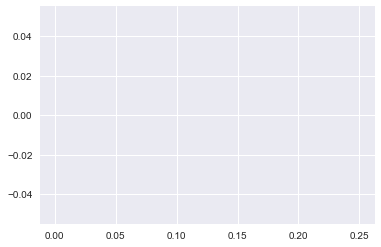

In [19]:
df_train['landtaxvaluedollarcnt'].hist(bins=np.linspace(0,.25,5))

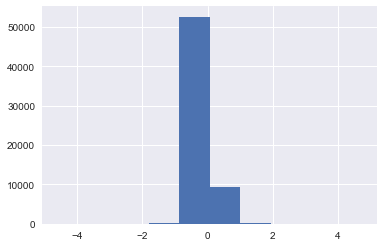

In [13]:
df_train['logerror'].hist()

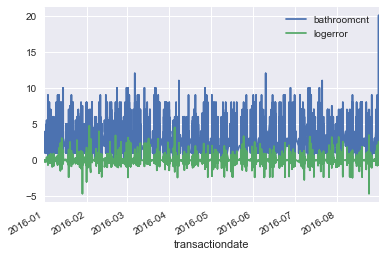

In [12]:
df_train[['bathroomcnt','logerror']].plot()

In [ ]:
for i in ('parcelid','bathroomcnt','bedroomcnt','calculatedfinishedsquarefeet', 'latitude', 'longitude', 
             'lotsizesquarefeet', 'poolcnt','propertycountylandusecode','propertylandusetypeid','regionidcity',
             'regionidcounty', 'regionidzip', 'roomcnt', 'yearbuilt', 'numberofstories','structuretaxvaluedollarcnt',
             'taxvaluedollarcnt','assessmentyear','landtaxvaluedollarcnt','taxamount'):
    sb.factorplot(
        #col = 'Transaction_Month', #stratified by Open status
        x=i,
        y='logerror',
        data=df_train, 
        kind='box'
    )

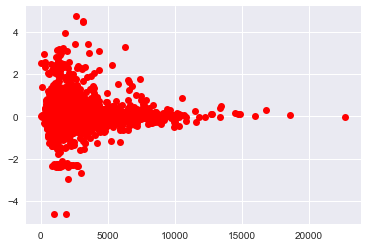

In [18]:
#for i in ('bathroomcnt','bedroomcnt','calculatedfinishedsquarefeet', 'latitude', 'longitude', 
#             'lotsizesquarefeet', 'poolcnt','propertylandusetypeid', 'roomcnt', 'yearbuilt', 'numberofstories','structuretaxvaluedollarcnt',
#             'taxvaluedollarcnt','assessmentyear','landtaxvaluedollarcnt','taxamount'):
plt.plot(df_train['calculatedfinishedsquarefeet'], df_train['logerror'], 'ro')

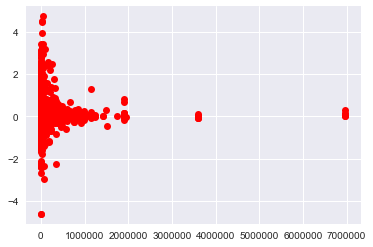

In [19]:
plt.plot(df_train['lotsizesquarefeet'], df_train['logerror'], 'ro')

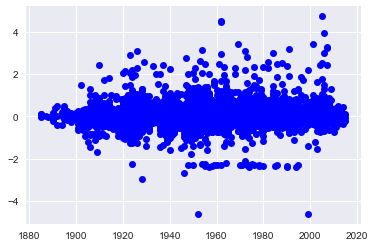

In [20]:
plt.plot(df_train['yearbuilt'], df_train['logerror'], 'bo')

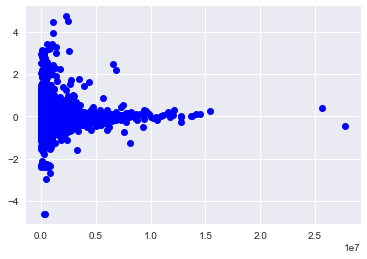

In [21]:
plt.plot(df_train['taxvaluedollarcnt'], df_train['logerror'], 'bo')

Axes(0.125,0.125;0.62x0.755)


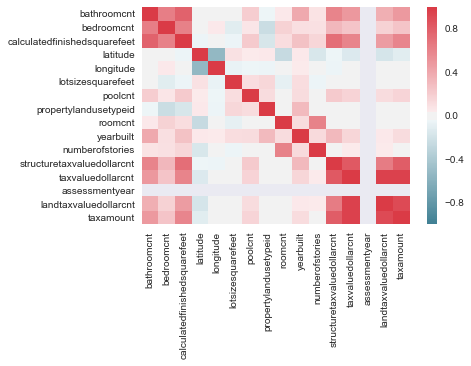

In [13]:
cmap = sb.diverging_palette(220, 10, as_cmap=True)

correlations = df_train[['bathroomcnt','bedroomcnt','calculatedfinishedsquarefeet', 'latitude', 'longitude', 
             'lotsizesquarefeet', 'poolcnt','propertylandusetypeid', 'roomcnt', 'yearbuilt', 'numberofstories','structuretaxvaluedollarcnt',
             'taxvaluedollarcnt','assessmentyear','landtaxvaluedollarcnt','taxamount']].corr()
#print correlations
print sb.heatmap(correlations, cmap=cmap)

In [ ]:
#features = df_train[['bathroomcnt','bedroomcnt','calculatedfinishedsquarefeet', 'latitude', 'longitude', 
#             'lotsizesquarefeet', 'poolcnt','propertylandusetypeid', 'roomcnt', 'yearbuilt', 'numberofstories','structuretaxvaluedollarcnt',
#             'taxvaluedollarcnt','assessmentyear','landtaxvaluedollarcnt','taxamount']]
#sb.pairplot(features, hue = )
#plt.show()

In [17]:
import folium

#create a map
this_map = folium.Map(prefer_canvas=True)

def plotDot(point):
    '''input: series that contains a numeric named latitude and a numeric named longitude
    this function creates a CircleMarker and adds it to your this_map'''
    folium.CircleMarker(location=[df_train['latitude'], df_train['longitude']],
                        radius=2,
                        weight=0).add_to(this_map)

#use df.apply(,axis=1) to "iterate" through every row in your dataframe
df_train.apply(plotDot, axis = 1)


#Set the zoom to the maximum possible
this_map.fit_bounds(this_map.get_bounds())

#Save the map to an HTML file
this_map.save('html_map_output/simple_dot_plot.html')

this_map

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().